# 과제1. Task1 파일에서 함수 구현

In [1]:
import numpy as np
from numpy.linalg import inv 

In [2]:
def estimate_beta(x, y):
    beta_hat = np.matmul(np.matmul(inv(np.matmul(x.T, x)), x.T), y)
    #beta hat이 (tr(x)*x)-1 * tr(x)*y 임을 나타내자
    return beta_hat

In [3]:
#x행렬에 intercept를 추가해야함
x = np.array([ [1, 0, 1],
               [1, 2, 3],
               [1, 3, 8]]) #3x3
y = np.transpose(np.array([1, 3, 7])) #3x1

In [4]:
x

array([[1, 0, 1],
       [1, 2, 3],
       [1, 3, 8]])

In [5]:
y

array([1, 3, 7])

In [6]:
estimate_beta(x,y)

array([0.25, 0.25, 0.75])

In [7]:
#sklearn은 디폴트로 intercept가 fit되므로, 데이터에 intercept가 포함된 경우는 fit_intercept=False로 해야함

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
reg = LinearRegression(fit_intercept=False).fit(x, y)

In [10]:
reg.coef_

array([0.25, 0.25, 0.75])

# 과제 2.
1) 1주차 과제 데이터로 선형회귀에 필요한 EDA/전처리/인코딩
 -범주형 변수 인코딩 3개, EDA 3개

2) hammer price를 target으로 선형회귀분석

3) 적합된 회귀식에 대해 데이터의 행렬을 통해 beta, mse 구해서 위의 값과 비교
 - sklearn 사용X, 행렬 통해 값 추출하기


# 데이터 불러오기 & 전처리

In [11]:
# #-*- coding: utf-8 -*-

In [12]:
import pandas as pd
import numpy as np
import csv
import warnings
import seaborn as sns; sns.set
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [14]:
df = pd.read_csv('Auction_master_train_1.csv', encoding='cp949') #데이터 불러오기

In [15]:
df.head(25) #데이터 확인

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000
5,2238,강제,일반,105437195,한마음감정,2017-01-03 00:00:00,2,1,8635.0,41.39,...,NaN,N,일산봉로,58.0,NaN,2017-10-25 00:00:00,배당,35.086933,129.065706,206989000
6,1923,임의,일반,137548730,미래새한감정,2016-01-19 00:00:00,3,2,7927.0,81.77,...,NaN,N,동삼서로,61.0,NaN,2016-11-03 00:00:00,배당,35.084049,129.070231,135500000
7,2527,임의,일반,506916971,부일감정,2016-04-28 00:00:00,2,1,331281.0,92.22,...,NaN,N,분포로,111.0,NaN,2016-11-22 00:00:00,배당,35.127808,129.112206,640299999
8,2259,강제,일반,40782876,금정감정,2016-03-08 00:00:00,2,1,1017.0,66.44,...,NaN,N,천마로27번길,10.0,NaN,2016-09-27 00:00:00,배당,35.080817,129.020155,77380000
9,2666,임의,일반,150000000,연산감정,2017-03-27 00:00:00,2,1,27447.2,78.52,...,NaN,N,재반로84번길,96.0,7.0,2017-12-27 00:00:00,배당,35.187903,129.130913,177070000


In [16]:
df.describe()

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_bunji1,addr_bunji2,Total_floor,Current_floor,road_bunji1,road_bunji2,point.y,point.x,Hammer_price
count,1933.000000,1.933000e+03,1933.000000,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03,1.933000e+03,1929.000000,889.000000,1933.000000,1933.000000,1909.000000,155.000000,1933.000000,1933.000000,1.933000e+03
mean,1380.271081,3.703908e+08,1.836006,0.788412,3.458714e+04,42.333802,41.310776,96.417693,94.148810,4.973592e+08,4.155955e+08,601.952307,22.742407,16.980859,8.817900,127.441069,12.748387,36.698018,127.731667,4.726901e+08
std,801.670470,1.337869e+09,0.938319,0.831715,9.442101e+04,65.274404,65.385900,106.323240,106.845985,7.873851e+08,5.030312e+08,554.119824,67.000807,9.509021,8.044644,188.394217,10.735663,1.150269,0.993055,5.574493e+08
min,1.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000,0.000000,9.390000,1.500000,4.285000e+06,4.285000e+06,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,35.051385,126.809393,6.303000e+06
25%,691.000000,7.746112e+07,1.000000,0.000000,2.997000e+03,25.870000,24.570000,61.520000,59.970000,2.090000e+08,1.750000e+08,189.000000,1.000000,12.000000,3.000000,24.000000,5.000000,35.188590,126.959167,1.975550e+08
50%,1395.000000,1.728143e+08,2.000000,1.000000,1.424140e+04,37.510000,36.790000,84.900000,84.860000,3.600000e+08,3.120000e+08,482.000000,5.000000,15.000000,7.000000,57.000000,9.000000,37.500862,127.065003,3.544500e+08
75%,2062.000000,3.565089e+08,2.000000,1.000000,4.140310e+04,51.790000,51.320000,114.940000,114.850000,5.720000e+08,4.864000e+08,834.000000,18.000000,21.000000,12.000000,145.000000,17.500000,37.566116,129.018054,5.599000e+08
max,2762.000000,2.286481e+10,13.000000,9.000000,3.511936e+06,2665.840000,2665.840000,4255.070000,4255.070000,2.777500e+10,1.422080e+10,4937.000000,1414.000000,80.000000,65.000000,1716.000000,55.000000,37.685575,129.255872,1.515100e+10


In [17]:
print(df.dropna(axis=1).shape) #결측치가 있는 열 제거

(1933, 35)


In [18]:
df.isnull().sum(axis=0) #확인

Auction_key                       0
Auction_class                     0
Bid_class                         0
Claim_price                       0
Appraisal_company                 0
Appraisal_date                    0
Auction_count                     0
Auction_miscarriage_count         0
Total_land_gross_area             0
Total_land_real_area              0
Total_land_auction_area           0
Total_building_area               0
Total_building_auction_area       0
Total_appraisal_price             0
Minimum_sales_price               0
First_auction_date                0
Final_auction_date                0
Final_result                      0
Creditor                          0
addr_do                           0
addr_si                           0
addr_dong                         0
addr_li                        1910
addr_san                          0
addr_bunji1                       4
addr_bunji2                    1044
addr_etc                          0
Apartment_usage             

In [19]:
df.corr #변수들 간의 상관관계를 알아보기 위함

<bound method DataFrame.corr of       Auction_key Auction_class Bid_class  Claim_price Appraisal_company  \
0            2687            임의        개별   1766037301              정명감정   
1            2577            임의        일반    152946867               희감정   
2            2197            임의        개별     11326510              혜림감정   
3            2642            임의        일반    183581724              신라감정   
4            1958            강제        일반     45887671              나라감정   
...           ...           ...       ...          ...               ...   
1928         1567            강제        일반    280000000              삼창감정   
1929         1295            임의        일반    200000000              삼상감정   
1930          254            임의        일반    354805459              서초감정   
1931         1486            강제        일반     80000000              한미감정   
1932          937            임의        일반    180000000              자연감정   

           Appraisal_date  Auction_count  Auction_misca

In [20]:
sns.pairplot(df)

C:\Users\lcm01\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\lcm01\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Error in callback <function flush_figures at 0x000001FC963D2828> (for post_execute):


KeyboardInterrupt: 

: 각 변수 사이의 상관관계 확인 가능

## 실행 확인하기!!

#VIF 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns
vif.sort_values(["VIF Factor"], ascending=[False])

# 1-1. 범주형 변수 인코딩1
- 서울: 0 , 부산: 1 로 인코딩하자

In [21]:
#한글 깨짐 현상 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [22]:
df.addr_do.value_counts()

서울    1242
부산     691
Name: addr_do, dtype: int64

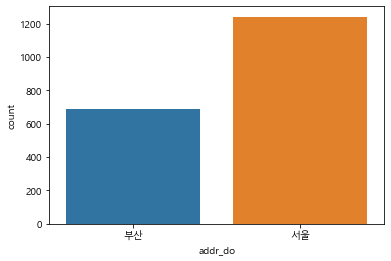

In [23]:
sns.countplot(df.addr_do)

In [24]:
def encoding_1 (x):
    if x == "서울":
        return 0
    else:
        return 1
df['d_addr_do'] = df['addr_do'].apply(encoding_1)
#서울/부산 더미변수열 생성  : 부산이면 0, 부산이 아니면(=서울이면) 1

In [25]:
df.tail() #f확인

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price,d_addr_do
1928,1567,강제,일반,280000000,삼창감정,2017-02-16 00:00:00,1,0,66419.3,40.55,...,N,노해로66길,21.0,NaN,2017-08-30 00:00:00,배당,37.648810,127.048683,402500000,0
1929,1295,임의,일반,200000000,삼상감정,2015-02-21 00:00:00,2,1,20433.8,39.60,...,N,덕릉로94길,21.0,NaN,2017-05-24 00:00:00,배당,37.663291,127.077063,430234600,0
1930,254,임의,일반,354805459,서초감정,2016-10-21 00:00:00,2,1,7460.8,19.03,...,N,소공로,35.0,NaN,2018-03-29 00:00:00,배당,37.558319,126.981994,1118999990,0
1931,1486,강제,일반,80000000,한미감정,2016-06-17 00:00:00,2,1,16875.8,42.20,...,N,우이천로,328.0,NaN,2017-01-24 00:00:00,배당,37.647061,127.028002,403000000,0
1932,937,임의,일반,180000000,자연감정,2015-04-17 00:00:00,2,1,32457.1,45.68,...,N,양천로55길,55.0,NaN,2016-08-25 00:00:00,배당,37.566255,126.848961,686010000,0


In [26]:
df.d_addr_do.value_counts()

0    1242
1     691
Name: d_addr_do, dtype: int64

# 1-2. 범주형 변수 인코딩2
- 일반: 10 , 개별: 01, 일괄: 00 로 인코딩하자

In [27]:
df.Bid_class.value_counts()

일반    1796
개별     125
일괄      12
Name: Bid_class, dtype: int64

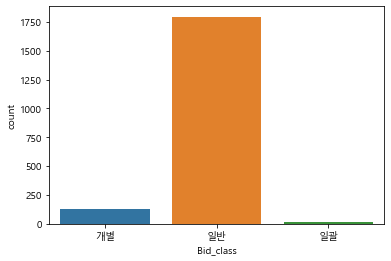

In [28]:
sns.countplot(df.Bid_class)

In [29]:
# 일반인 경우 1을 return
def encoding_2 (x):
    if x == "일반":
        return 1

    else: 
        return 0

df['Bid_i'] = df['Bid_class'].apply(encoding_2)

In [30]:
# 개별인 경우 1을 return
def encoding_3 (x):
    if x == "개별":
        return 1

    else: 
        return 0

df['Bid_g'] = df['Bid_class'].apply(encoding_3)

In [31]:
df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price,d_addr_do,Bid_i,Bid_g
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000,1,0,1
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999,1,1,0
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999,1,0,1
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000,1,1,0
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000,1,1,0


# 1-3. 범주형 변수 인코딩3
- 저층: 10 , 중층: 01, 고층: 00 로 인코딩하자

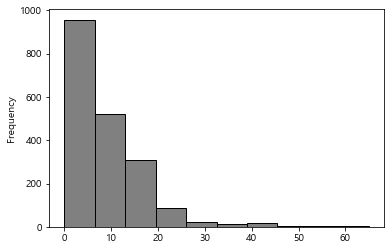

In [32]:
df['Current_floor'].plot.hist(color='grey', edgecolor='black')

In [33]:
# 저/중/고층 피처 생성
def floor(x):
    if 0 <= x <= 9:
        return '저층'
    elif 10 <= x <= 20:
        return '중층'
    else:
        return '고층'

df['층수'] = df['Current_floor'].apply(floor)

In [34]:
df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price,d_addr_do,Bid_i,Bid_g,층수
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000,1,0,1,저층
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999,1,1,0,고층
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999,1,0,1,중층
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000,1,1,0,중층
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000,1,1,0,저층


In [35]:
# 저층인 경우 1을 return
def encoding_f1 (x):
    if x == "저층":
        return 1

    else: 
        return 0

df['floor_low'] = df['층수'].apply(encoding_f1)

In [36]:
# 중층인 경우 1을 return
def encoding_f2 (x):
    if x == "중층":
        return 1

    else: 
        return 0

df['floor_mid'] = df['층수'].apply(encoding_f2)

In [37]:
df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Close_result,point.y,point.x,Hammer_price,d_addr_do,Bid_i,Bid_g,층수,floor_low,floor_mid
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,배당,35.162717,129.137048,760000000,1,0,1,저층,1,0
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,배당,35.156633,129.145068,971889999,1,1,0,고층,0,0
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,배당,35.184601,128.996765,93399999,1,0,1,중층,0,1
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,배당,35.154180,129.089081,256899000,1,1,0,중층,0,1
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,배당,35.099630,128.998874,158660000,1,1,0,저층,1,0


# 2. 선형회귀분석

y: Hammer_price

x: 나머지 변수

In [38]:
# 선형회귀분석을 위한 x1 설정
# Hammer_price와 관련없는 변수 제거 후 x1 설정했습니다!
x1 = df[['Claim_price', 'Auction_count', 
        'Auction_miscarriage_count', 'Total_land_gross_area', 
        'Total_land_real_area', 'Total_land_auction_area', 
        'Total_building_area', 'Total_building_area',
        'Total_appraisal_price', 'Minimum_sales_price',
        'Total_floor', 'Current_floor',
                  
        'd_addr_do', 'Bid_i', 'Bid_g', 'floor_low', 'floor_mid']]

In [39]:
y1 = df['Hammer_price']

In [40]:
x1

,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_area,Total_appraisal_price,Minimum_sales_price,Total_floor,Current_floor,d_addr_do,Bid_i,Bid_g,floor_low,floor_mid
0,1766037301,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,45,5,1,0,1,1,0
1,152946867,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,70,51,1,1,0,0,0
2,11326510,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,15,14,1,0,1,0,1
3,183581724,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,20,11,1,1,0,0,1
4,45887671,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,7,7,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,280000000,1,0,66419.3,40.55,40.55,84.87,84.87,401000000,401000000,21,15,0,1,0,0,1
1929,200000000,2,1,20433.8,39.60,39.60,114.81,114.81,454000000,363200000,23,23,0,1,0,0,0
1930,354805459,2,1,7460.8,19.03,19.03,133.98,133.98,1285000000,1028000000,32,19,0,1,0,0,1
1931,80000000,2,1,16875.8,42.20,42.20,84.94,84.94,407000000,325600000,15,11,0,1,0,0,1


In [51]:
y1

0        760000000
1        971889999
2         93399999
3        256899000
4        158660000
           ...    
1928     402500000
1929     430234600
1930    1118999990
1931     403000000
1932     686010000
Name: Hammer_price, Length: 1933, dtype: int64

In [42]:
x1.shape, y1.shape

((1933, 17), (1933,))

In [43]:
#다중공선성을 알아보자
x1.corr()

,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_area,Total_appraisal_price,Minimum_sales_price,Total_floor,Current_floor,d_addr_do,Bid_i,Bid_g,floor_low,floor_mid
Claim_price,1.000000,0.013312,0.015411,0.003771,0.180421,0.182207,0.202379,0.202379,0.248846,0.261076,0.016466,0.043258,-0.100203,-0.273204,0.265928,-0.014631,0.004776
Auction_count,0.013312,1.000000,0.972918,-0.045697,0.062824,0.062868,0.107074,0.107074,0.071038,-0.036716,-0.052329,-0.029124,0.053300,-0.179376,0.173782,0.024948,-0.007696
Auction_miscarriage_count,0.015411,0.972918,1.000000,-0.050457,0.069582,0.069392,0.118290,0.118290,0.077547,-0.033039,-0.045343,-0.021852,0.056091,-0.189082,0.183279,0.012713,0.003126
Total_land_gross_area,0.003771,-0.045697,-0.050457,1.000000,0.049791,0.048225,0.017401,0.017401,0.041896,0.067135,0.100557,0.094385,-0.016506,0.053319,-0.057026,-0.092402,0.061691
Total_land_real_area,0.180421,0.062824,0.069582,0.049791,1.000000,0.996224,0.940361,0.940361,0.842248,0.711515,-0.072543,-0.062673,-0.064039,-0.055658,-0.056343,0.049879,-0.035499
Total_land_auction_area,0.182207,0.062868,0.069392,0.048225,0.996224,1.000000,0.938144,0.938144,0.845243,0.715891,-0.068385,-0.061274,-0.059051,-0.059150,-0.052899,0.050809,-0.038470
Total_building_area,0.202379,0.107074,0.118290,0.017401,0.940361,0.938144,1.000000,1.000000,0.900302,0.783299,0.107069,0.071110,-0.067411,-0.066550,-0.043855,-0.025719,-0.016202
Total_building_area,0.202379,0.107074,0.118290,0.017401,0.940361,0.938144,1.000000,1.000000,0.900302,0.783299,0.107069,0.071110,-0.067411,-0.066550,-0.043855,-0.025719,-0.016202
Total_appraisal_price,0.248846,0.071038,0.077547,0.041896,0.842248,0.845243,0.900302,0.900302,1.000000,0.960357,0.169577,0.151757,-0.229401,-0.080290,-0.031358,-0.044374,-0.028173
Minimum_sales_price,0.261076,-0.036716,-0.033039,0.067135,0.711515,0.715891,0.783299,0.783299,0.960357,1.000000,0.223407,0.201913,-0.295578,-0.051115,-0.049070,-0.065873,-0.029150


~area 변수들끼리 상관관계가 높음을 확인할 수 있다.

In [44]:
#VIF를 확인하자!
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["features"] = x1.columns
vif.sort_values(["VIF Factor"], ascending=[False])

C:\Users\lcm01\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
6,inf,Total_building_area
7,inf,Total_building_area
4,208.090736,Total_land_real_area
5,193.554329,Total_land_auction_area
8,90.973177,Total_appraisal_price
1,85.257553,Auction_count
13,65.479757,Bid_i
9,56.156014,Minimum_sales_price
2,34.719053,Auction_miscarriage_count
15,30.614405,floor_low


다중공선성이 큰 변수들을 제거하고 다시 데이터를 만들자!
:: 코드를 다시 돌려보고 체크하면서 'Total_building_area' 열을 두 번 넣은 걸 발견했습니다ㅠㅠ VIF로 체크해서 뺀 변수로 간주할게요 죄송합니당

In [45]:
#다중공선성이 큰 변수들이 많지만 회귀분석을 위해 상위 4개만 제거

In [52]:
x2 = df[['Claim_price', 'Auction_count', 
        'Auction_miscarriage_count', 
         'Total_land_gross_area', 
        'Total_building_area',
        'Total_appraisal_price', 
         'Minimum_sales_price',
        'Total_floor', 
         'Current_floor',
                  
        'd_addr_do', 'Bid_i', 'Bid_g', 'floor_low', 'floor_mid']]

In [53]:
# train, test data 분할
from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y1, test_size=0.2, random_state=0)

In [55]:
from sklearn.linear_model import LinearRegression

#모델 불러옴
model = LinearRegression()
#train data에 fit시킴
model.fit(x2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
#모델의 R-square
model.score(x2_train, y2_train)

0.9910752782107796

In [57]:
#MSE를 계산하자
import sklearn as sk
sk.metrics.mean_squared_error(y2_train, model.predict(x2_train))

#MSE의 값이 매우 큼을 알 수 있음...

3169731350268051.5

In [58]:
print(model.coef_) #추정된 회귀계수와
print(model.intercept_) #intercept를 출력하자!

[ 4.41179052e-03 -1.73437147e+07  3.72960233e+07  2.24587054e+01
 -3.18434549e+05  4.29484714e-02  1.08304487e+00  2.89081600e+05
 -7.63635984e+05 -1.20784289e+07 -3.91724282e+07 -6.32196199e+07
 -7.40050019e+06 -2.24982924e+06]
85127355.42390692


In [59]:
#test데이터 예측
model.predict(x2_test)

array([4.27405726e+08, 9.35120947e+08, 1.96433967e+08, 2.88558690e+08,
       7.13644768e+08, 8.08504497e+07, 6.12497024e+08, 3.26613340e+08,
       9.55162904e+08, 4.15486764e+08, 5.90999972e+08, 1.97525227e+08,
       7.35138930e+08, 3.72674278e+08, 1.01244447e+08, 2.66678407e+08,
       9.08164536e+07, 1.41304971e+08, 8.42501180e+08, 1.29298227e+09,
       4.43653653e+08, 2.34525495e+08, 1.65451287e+09, 2.77188239e+08,
       1.34393025e+08, 1.51583765e+08, 5.91667481e+08, 1.03199620e+09,
       4.10302655e+08, 4.49576722e+07, 1.13274908e+09, 3.19546548e+08,
       3.35162635e+08, 6.59998548e+08, 5.97385733e+08, 3.34941622e+08,
       4.88302365e+08, 2.99222547e+08, 5.80981335e+08, 5.04902094e+08,
       9.60212682e+08, 6.91696390e+07, 3.10327572e+08, 1.90519010e+07,
       3.85298470e+08, 1.00652981e+09, 1.79091765e+08, 1.34076142e+09,
       4.40871891e+08, 3.33713147e+08, 8.22203789e+08, 9.37772174e+08,
       1.49288660e+08, 3.24718020e+08, 8.68017499e+08, 1.81827114e+08,
      

In [61]:
#test데이터 R-square
model.score(x2_test, y2_test) #큰 값을 가진다

0.9853579995694984

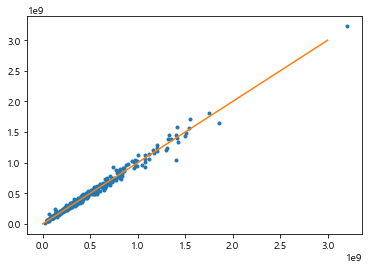

In [63]:
# 예측 vs. 실제데이터 plot
y_pred = model.predict(x2_test) 
plt.plot(y2_test, y_pred, '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 3e9, 100)
y = x
plt.plot(x, y)
plt.show()

잘 분포해있음!

# 3. 행렬을 통해 beta와 MSE 구하기

In [64]:
x = np.array(x2) #3x3
y = np.transpose(np.array(y1)) #3x1

In [65]:
x #데이터 확인

array([[1.76603730e+09, 2.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.52946867e+08, 2.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.13265100e+07, 3.00000000e+00, 2.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [3.54805459e+08, 2.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [8.00000000e+07, 2.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.80000000e+08, 2.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [66]:
y

array([ 760000000,  971889999,   93399999, ..., 1118999990,  403000000,
        686010000], dtype=int64)

In [67]:
estimate_beta(x,y)

array([ 4.58941154e-03, -1.34186609e+07,  3.26637589e+07,  2.44945488e+01,
       -2.78289284e+05,  3.48610648e-02,  1.09248838e+00,  2.82059100e+05,
       -3.62203418e+05, -8.43905365e+06,  1.88269709e+07, -5.46568286e+06,
        8.39898246e+06,  1.06241316e+07])

In [68]:
#앞의 문제에서 구한 값과 비교하면
print(model.coef_)
print(model.intercept_)

[ 4.41179052e-03 -1.73437147e+07  3.72960233e+07  2.24587054e+01
 -3.18434549e+05  4.29484714e-02  1.08304487e+00  2.89081600e+05
 -7.63635984e+05 -1.20784289e+07 -3.91724282e+07 -6.32196199e+07
 -7.40050019e+06 -2.24982924e+06]
85127355.42390692


완전히 일치한다고는 할 수 없지만, 몇몇 값을 제외하고는 비슷한 값을 가짐을 확인할 수 있음.

In [70]:
# MSE 행렬
def mse(y, t):
    return ((y-t)**2).mean(axis=None)

mse(y2_train, model.predict(x2_train))

3169731350268049.5

In [71]:
#비교
sk.metrics.mean_squared_error(y2_train, model.predict(x2_train))

3169731350268051.5

In [ ]:
# 둘의 결과가 비슷함을 알 수 있음!